In [1]:
#Faia_2008
import pandas as pd

raw_data = pd.read_csv("/Users/annaevseeva/Downloads/MARL Dynare/Faia_2008.csv")
raw_data.head()

,lambda,c,R,pi,theta,v,u,m,q,n,...,mc,w,g,z_G,log_y_net,log_v,log_w,log_u,log_theta,log_pi
0,-4.352482,1.461881,0.989875,0.959952,2.536870,0.321123,0.126582,0.165251,0.151289,0.873418,...,1.435327,1.347037,-0.046713,-1.224837,0.517804,-0.261332,0.479725,-2.066863,1.805531,-0.040048
1,-8.517840,1.966177,0.942720,0.902628,4.041138,0.441116,0.044425,0.195930,-0.340105,0.955575,...,1.288292,1.595759,-0.108322,-1.521376,1.050488,0.844601,0.799132,-2.715909,3.560510,-0.097372
2,-11.235730,2.295229,0.937112,0.975556,5.592280,0.548483,-0.059385,0.216110,-0.846811,1.059385,...,2.116619,2.145832,0.043253,-0.791813,1.628827,1.834168,1.505532,-3.536008,5.370176,-0.024444
3,-12.246775,2.417636,0.817624,0.748961,6.132771,0.519124,-0.173456,0.176403,-1.023372,1.173456,...,-0.171361,1.490763,-0.065394,-1.314753,1.645383,1.563583,0.664297,-4.437165,6.000748,-0.251039
4,-11.367570,2.311191,0.776359,0.880186,6.246543,0.474885,-0.241870,0.141403,-1.060538,1.241870,...,0.563877,1.688421,0.000126,-0.999393,1.596138,1.155847,0.918129,-4.977637,6.133483,-0.119814


In [2]:
print(raw_data.columns.to_list())

['lambda', 'c', 'R', 'pi', 'theta', 'v', 'u', 'm', 'q', 'n', 'y_gross', 'y_net', 'mu', 'z', 'mc', 'w', 'g', 'z_G', 'log_y_net', 'log_v', 'log_w', 'log_u', 'log_theta', 'log_pi']


In [4]:
mapping = {
    "lambda": "Lagrange Multiplier A",
    "c": "Consumption",
    "R": "Nominal Interest Rate",
    "pi": "Inflation Rate",
    "theta": "Market Tightness",
    "v": "Vacancies",
    "u": "Unemployment Rate",
    "m": "Matches",
    "q": "Meeting Rate Between Firms And Workers",
    "n": "Employment",
    "y_gross": "Gross Output A",
    "y_net": "Gross Output B",
    "mu": "Lagrange Multiplier B",
    "z": "Log TFP",
    "mc": "Marginal Costs",
    "w": "Real Wage",
    "g": "Government Spending",
    "z_G": "Government Spending Shock",
    "log_y_net": "Log Output",
    "log_v": "Log Vacancies",
    "log_w": "Log Wages",
    "log_u": "Log Unemployment",
    "log_theta": "Log Tightness A",
    "log_pi": "Log Tightness B"
}

raw_data = raw_data.rename(columns=mapping)

# Вывод обновленного датафрейма
print(raw_data.head())
idx = raw_data.columns.get_loc('Inflation Rate')
print(idx)

   Lagrange Multiplier A  Consumption  Nominal Interest Rate  Inflation Rate  \
0              -4.352482     1.461881               0.989875        0.959952   
1              -8.517840     1.966177               0.942720        0.902628   
2             -11.235730     2.295229               0.937112        0.975556   
3             -12.246775     2.417636               0.817624        0.748961   
4             -11.367570     2.311191               0.776359        0.880186   

   Market Tightness  Vacancies  Unemployment Rate   Matches  \
0          2.536870   0.321123           0.126582  0.165251   
1          4.041138   0.441116           0.044425  0.195930   
2          5.592280   0.548483          -0.059385  0.216110   
3          6.132771   0.519124          -0.173456  0.176403   
4          6.246543   0.474885          -0.241870  0.141403   

   Meeting Rate Between Firms And Workers  Employment  ...  Marginal Costs  \
0                                0.151289    0.873418  ...    

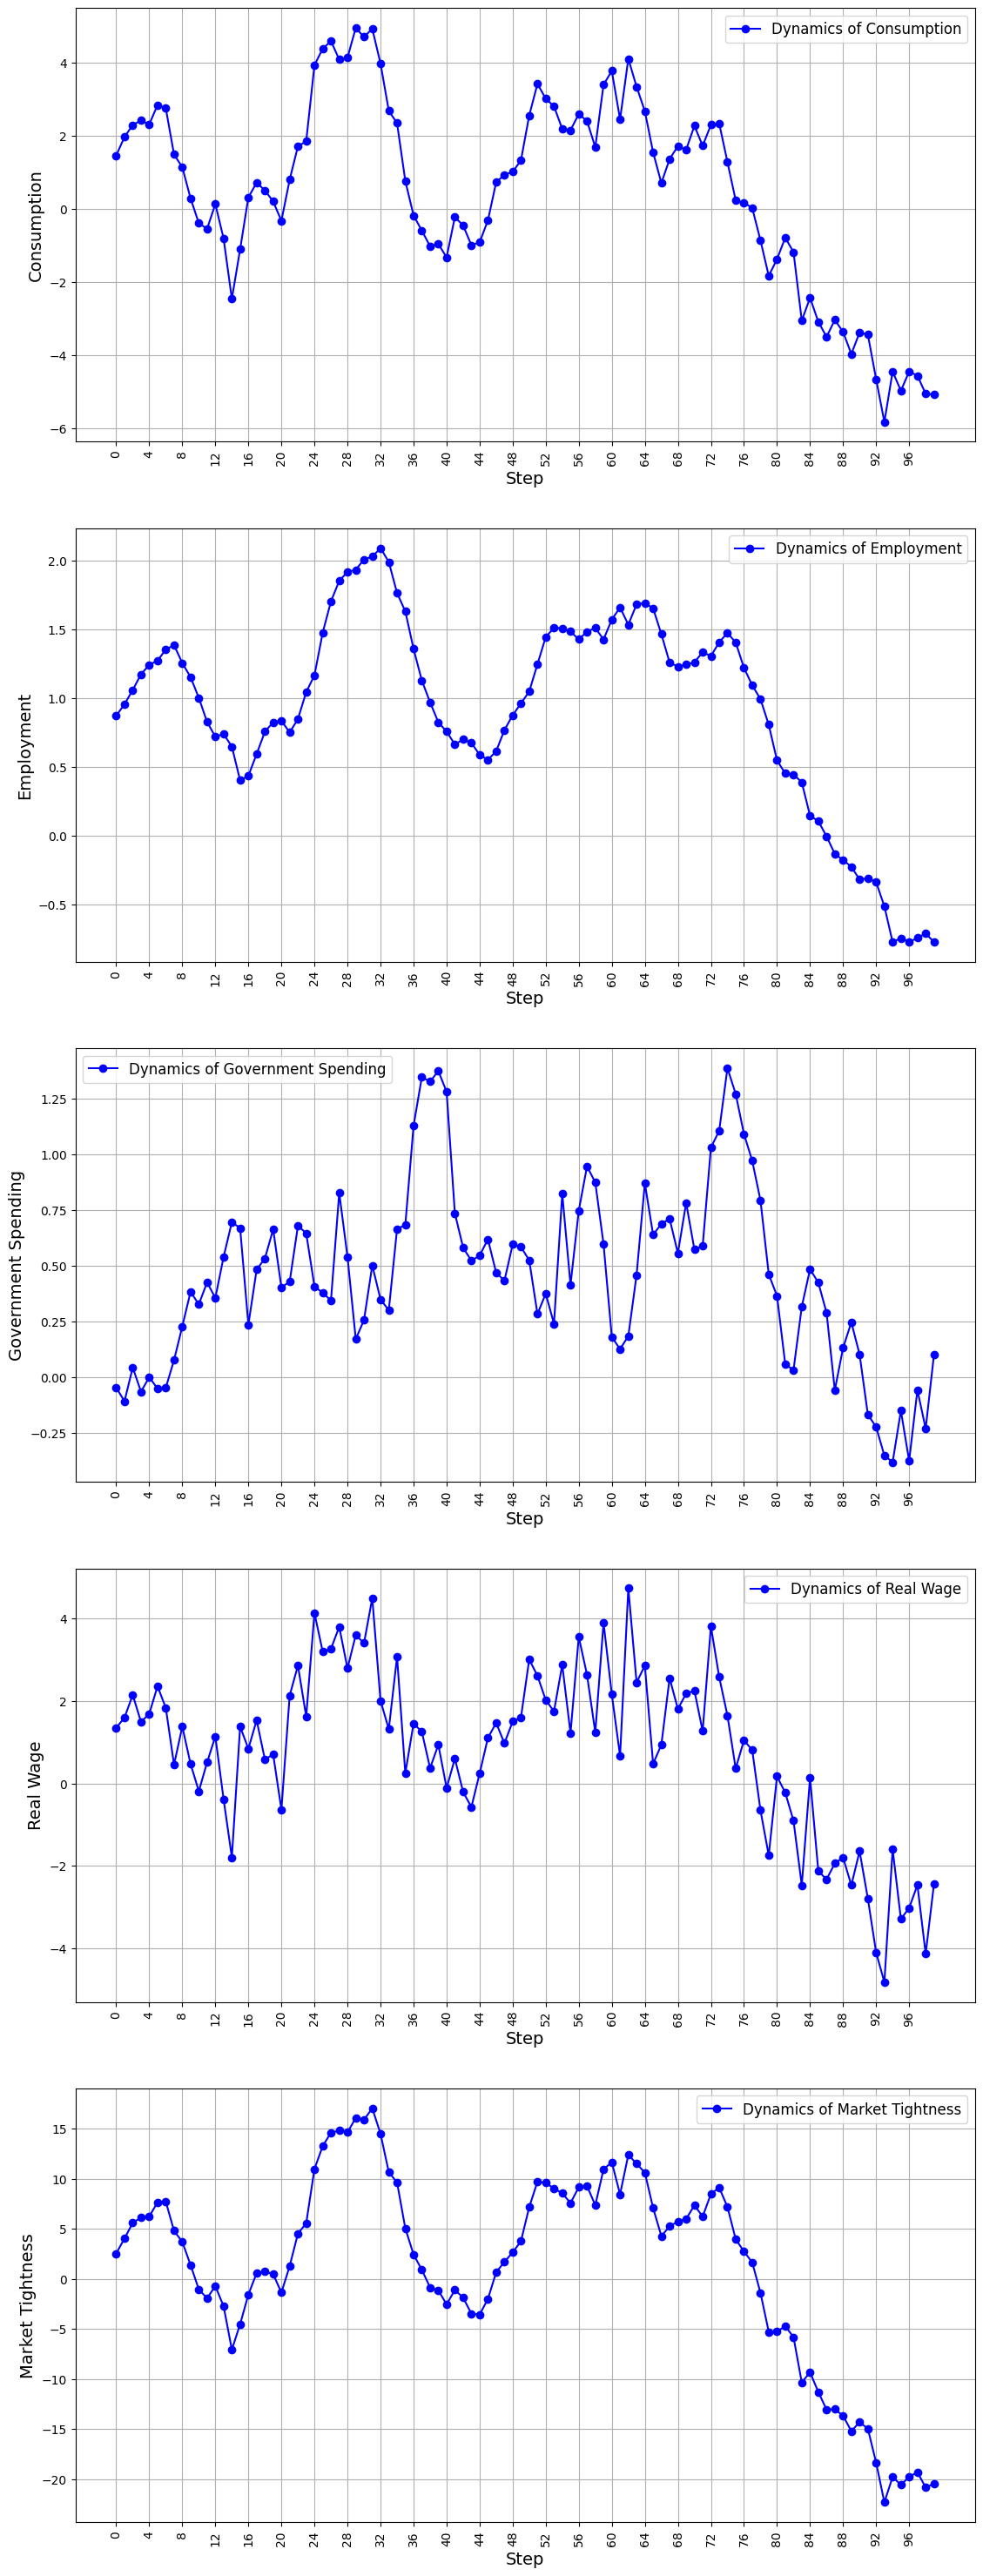

In [5]:
import matplotlib.pyplot as plt
import numpy as np

columns = ["Consumption", "Employment", "Government Spending", "Real Wage", "Market Tightness"]
# columns = ["y", "c", "k", "invest"]


fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(13.33, 7.5 * len(columns)))

for idx, column in enumerate(columns):
    
    column_values = raw_data[column].to_numpy()
    
    steps = np.arange(len(column_values))
    
    ax = axes[idx]
    
    ax.plot(steps, column_values, marker='o', color='blue', label=f"Dynamics of {column}")
    
    
    ax.legend(fontsize=12)
    ax.set_xlabel("Step", fontsize=14)
    ax.set_ylabel(f"{column}", fontsize=14)
    ax.set_xticks(steps[::4])
    # ax.set_yticks(np.arange(np.min(column_values), np.max(column_values)))
    ax.set_xticklabels(ax.get_xticks(), rotation=90)
    ax.grid(True)